El primer objetivo de este ejercicio es identificar cuales variables(columnas) de un dataset aportan de verdad en una regresión, para esto usaremos la libreria statsmodels.

Primero instalemos la libreria statmodels:

In [1]:
#%pip install statsmodels

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

Carguemos los datos y exploremoslos:

In [3]:
datos = pd.read_csv('carros.csv')
datos.head()

,Sillas,N° de Cilindros,Cilindraje,Potencia,Torque,N° de Marchas,Distancia entre ejes en mm,Longitud en mm,Ancho en mm,Altura en mm,Peso (Kg),Capacidad del Tanque en Litros,Tiempo en segundos en alcanzar 100 kph,Máxima Velocidad Km/h,Consumo de gasolina en litros por cada 100Km,"Ensamble 1 local=1,extranjero=0"
0,5,4,1596,74,141,5,2570,4325,1645,1380,1065,55,12.1,182,8.6,1
1,5,4,1766,75,140,5,2570,4325,1645,1380,1065,55,12.1,182,6.8,1
2,5,4,1766,75,140,5,2570,4325,1645,1380,1020,55,11.9,180,8.2,1
3,5,4,1796,83,162,5,2570,4325,1645,1380,1065,55,10.8,188,8.6,1
4,5,6,1990,92,170,5,2570,4325,1645,1380,1050,55,10.4,196,11.4,1


Estadística descriptiva:

In [4]:
datos.describe().T

,count,mean,std,min,25%,50%,75%,max
Sillas,565.0,4.844248,0.362942,4.0,5.0,5.0,5.0,5.0
N° de Cilindros,565.0,4.688496,0.981365,3.0,4.0,4.0,6.0,6.0
Cilindraje,565.0,2154.125664,583.738426,999.0,1796.0,1995.0,2979.0,3246.0
Potencia,565.0,135.123894,49.484386,40.0,92.0,130.0,170.0,252.0
Torque,565.0,307.594690,121.462922,82.0,200.0,300.0,380.0,630.0
N° de Marchas,565.0,6.309735,1.288793,4.0,5.0,6.0,8.0,8.0
Distancia entre ejes en mm,565.0,2723.762832,92.240841,2380.0,2620.0,2725.0,2810.0,2920.0
Longitud en mm,565.0,4493.568142,162.884736,3810.0,4405.0,4520.0,4624.0,4824.0
Ancho en mm,565.0,1779.469027,49.838190,1635.0,1739.0,1799.0,1817.0,1828.0
Altura en mm,565.0,1429.856637,49.067102,1330.0,1393.0,1418.0,1460.0,1578.0


Analisis univariante:

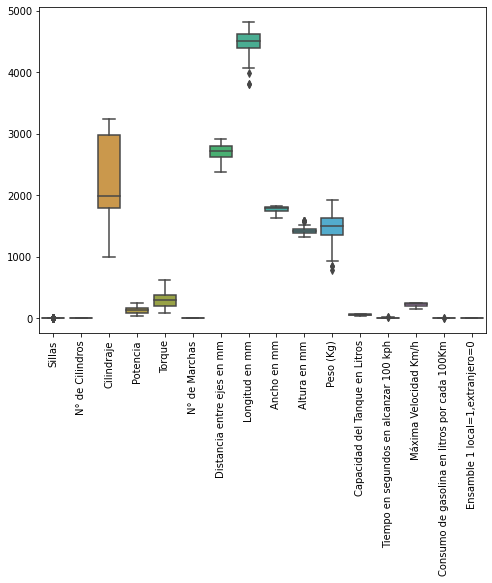

In [5]:
plt.figure(figsize=(8,6))
sns.boxplot(data=datos)
plt.xticks(rotation=90)
plt.show()

Mapa de calor de correlaciones:

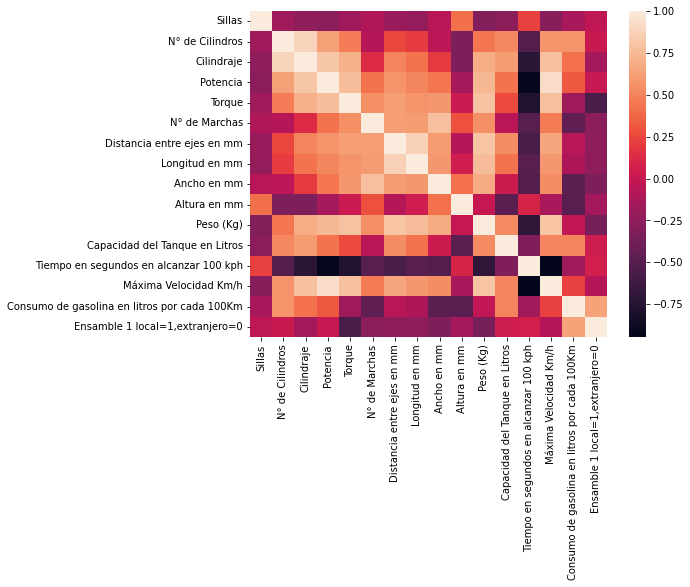

In [6]:
plt.figure(figsize=(8,6))
sns.heatmap(datos.corr(), annot=False)
plt.show()

Ahora si, identifiquemos cuales columnas no tienen relevancia estadistica si la columna objetivo o salida deseada del modelo es 'Tiempo en segundos en alcanzar 100 kph':

In [7]:
X=datos.drop([
    'Tiempo en segundos en alcanzar 100 kph',
    'Consumo de gasolina en litros por cada 100Km',
    'Peso (Kg)',
    'Distancia entre ejes en mm',
    'Ancho en mm',
],axis=1)
X=sm.add_constant(X)
resultados = sm.OLS(datos['Tiempo en segundos en alcanzar 100 kph'], X).fit()
print(resultados.summary())
# resultados.summary2()

                                      OLS Regression Results                                      
Dep. Variable:     Tiempo en segundos en alcanzar 100 kph   R-squared:                       0.948
Model:                                                OLS   Adj. R-squared:                  0.947
Method:                                     Least Squares   F-statistic:                     909.0
Date:                                    Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                                            16:07:11   Log-Likelihood:                -414.98
No. Observations:                                     565   AIC:                             854.0
Df Residuals:                                         553   BIC:                             906.0
Df Model:                                              11                                         
Covariance Type:                                nonrobust                                         
          

Por lo tanto, podemos eliminar las columnas:
- Consumo de gasolina en litros por cada 100Km'
- Peso (Kg)'
- Distancia entre ejes en mm'
- Ancho en mm'

El segundo objetivo de este ejercicio es poder realizar un modelo de regresion para algún par de columnas que presenten alta correlacion:

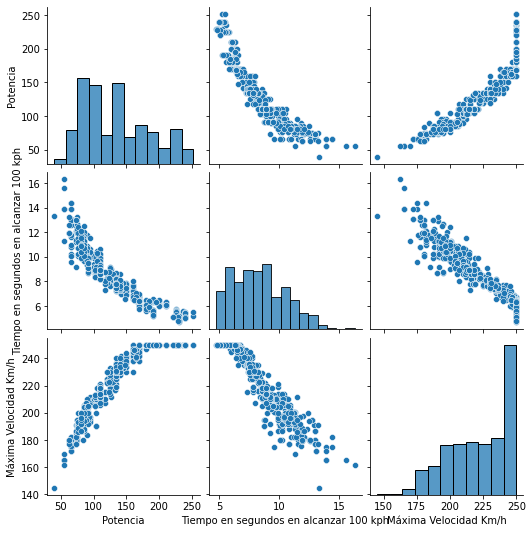

In [16]:
sns.pairplot(data= datos.iloc[:,[3,12,13]])
plt.show()

In [9]:
df = datos.iloc[:,[3,12]]
df.columns = ['x1','y']
df

,x1,y
0,74,12.1
1,75,12.1
2,75,11.9
3,83,10.8
4,92,10.4
...,...,...
560,81,12.1
561,110,8.9
562,110,8.9
563,135,7.8


Agreguemos las columnas que se consideren necesarias para encontrar una curva de regresion que se ajuste a la entrada y salida propuesta:

In [10]:
pd.options.mode.chained_assignment=None #comando para quitar el warning de más abajom

In [11]:
df['x2']=df.loc[:,'x1']**2
# df['x3']=df.loc[:,'x1']**3
# df['x4']=df.loc[:,'x1']**4
df.head()

,x1,y,x2
0,74,12.1,5476
1,75,12.1,5625
2,75,11.9,5625
3,83,10.8,6889
4,92,10.4,8464


Ajustemos un modelo:

In [12]:
modelo = LinearRegression()
modelo.fit(df[['x1','x2']].values, df['y'].values)
modelo.coef_,modelo.intercept_

(array([-0.10901468,  0.00022973]), 18.306212239628987)

Evaluemos las metricas de desempeño:

In [13]:
modelo.score(df[['x1','x2']].values, df['y'].values)

0.9178736434387892

In [14]:
mean_absolute_error( df['y'].values, modelo.predict(df[['x1','x2']].values))

0.46172528882432046

Por ultimo, grafiquemos la curva de regresion:

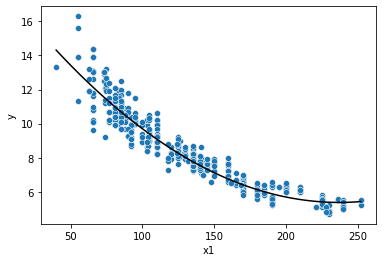

In [15]:
x = np.linspace(df['x1'].min(),df['x1'].max(),100)
y = modelo.predict(np.vstack([x,x**2]).T)
sns.scatterplot(data=df,x='x1',y='y')
plt.plot(x,y,'k')
plt.show()